In [61]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv("./data/datasets.csv")

In [5]:
data

,Tanggal,Pengeluaran Harian
0,2022-03-15,556511
1,2022-03-16,118605
2,2022-03-17,65499
3,2022-03-18,93439
4,2022-03-19,103951
...,...,...
995,2024-12-04,105813
996,2024-12-05,60164
997,2024-12-06,138942
998,2024-12-07,126407


In [7]:
data['Tanggal'] = pd.to_datetime(data['Tanggal'])

In [9]:
data = data.sort_values('Tanggal')

In [15]:
scaler = MinMaxScaler()
data['Scaled Pengeluaran'] = scaler.fit_transform(data[['Pengeluaran Harian']])

In [17]:
data

,Tanggal,Pengeluaran Harian,Scaled Pengeluaran
0,2022-03-15,556511,0.866229
1,2022-03-16,118605,0.131491
2,2022-03-17,65499,0.042387
3,2022-03-18,93439,0.089266
4,2022-03-19,103951,0.106904
...,...,...,...
995,2024-12-04,105813,0.110028
996,2024-12-05,60164,0.033436
997,2024-12-06,138942,0.165613
998,2024-12-07,126407,0.144581


In [29]:
sequence_length = 7
x = []
y = []

for i in range(sequence_length, len(data)):
    x.append(data['Scaled Pengeluaran'].values[i-sequence_length:i])
    y.append(data['Scaled Pengeluaran'].values[i])

In [31]:
x = np.array(x)
y = np.array(y)

split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [47]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 0.0109 - val_loss: 0.0065
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0073 - val_loss: 0.0065
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0060 - val_loss: 0.0065
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0086 - val_loss: 0.0064
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0075 - val_loss: 0.0065
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0072 - val_loss: 0.0064
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0064 - val_loss: 0.0066
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0080 - val_loss: 0.0063
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - val_loss: 0.0065
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0087 - val_loss: 0.0065
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0100 - val_loss: 0.0063
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.

In [55]:
y_pred = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [105]:
errors = np.abs(y_test - y_pred.flatten())
threshold = np.percentile(errors, 98)  # Ambil threshold error
anomalies = errors > threshold

In [107]:
y_dates = data['Tanggal'].iloc[split + sequence_length:][anomalies]

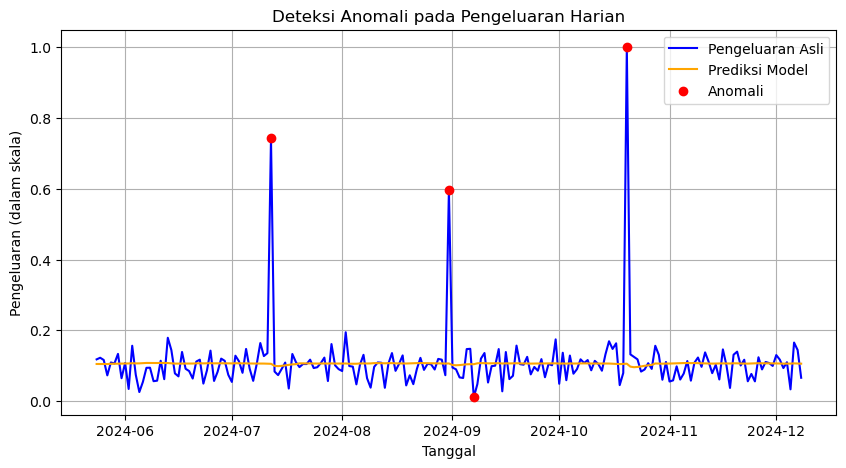

In [109]:
plt.figure(figsize=(10, 5))

plt.plot(data['Tanggal'][split + sequence_length:], y_test, label='Pengeluaran Asli', color='blue')
plt.plot(data['Tanggal'][split + sequence_length:], y_pred, label='Prediksi Model', color='orange')
plt.scatter(y_dates, y_test[anomalies], color='red', label='Anomali', zorder=5)

plt.title('Deteksi Anomali pada Pengeluaran Harian')
plt.xlabel('Tanggal')
plt.ylabel('Pengeluaran (dalam skala)')
plt.legend()
plt.grid()
plt.show()

In [113]:
model.save("./model/my_model_saved.h5")

In [115]:
model.save("./model/my_model_saved.keras")